# Visualización de la Información
## Proyecto final
**Integrantes**
- Lucas Cedric Cervantes Beutelspacher
- Guillermo Gerardo Andrés Urbano
- Hugo Didier Longines Tapia
- Elsy Camila Silva Velázquez


In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
import plotly.express as px
import requests
from datetime import datetime
import matplotlib.dates as mdates

plt.rcParams.update({'font.family':'Times New Roman', 
                     'font.size':15, 
                     'text.color':'black',
                     "ytick.color" : "black",
                     "xtick.color" : "black",
                     "axes.labelcolor" : "black",
                     "axes.edgecolor" : "black"})

%config InlineBackend.figure_format = 'retina'

## Ingresos a hospitales 


In [2]:
covid = pd.read_csv("220604COVID19MEXICO.csv")
covid['FECHA_ACTUALIZACION'] =  pd.to_datetime(covid['FECHA_ACTUALIZACION'], format='%Y-%m-%d')
covid['FECHA_INGRESO'] =  pd.to_datetime(covid['FECHA_INGRESO'], format='%Y-%m-%d')
covid['FECHA_SINTOMAS'] =  pd.to_datetime(covid['FECHA_SINTOMAS'], format='%Y-%m-%d')

C:\Users\Lucas\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


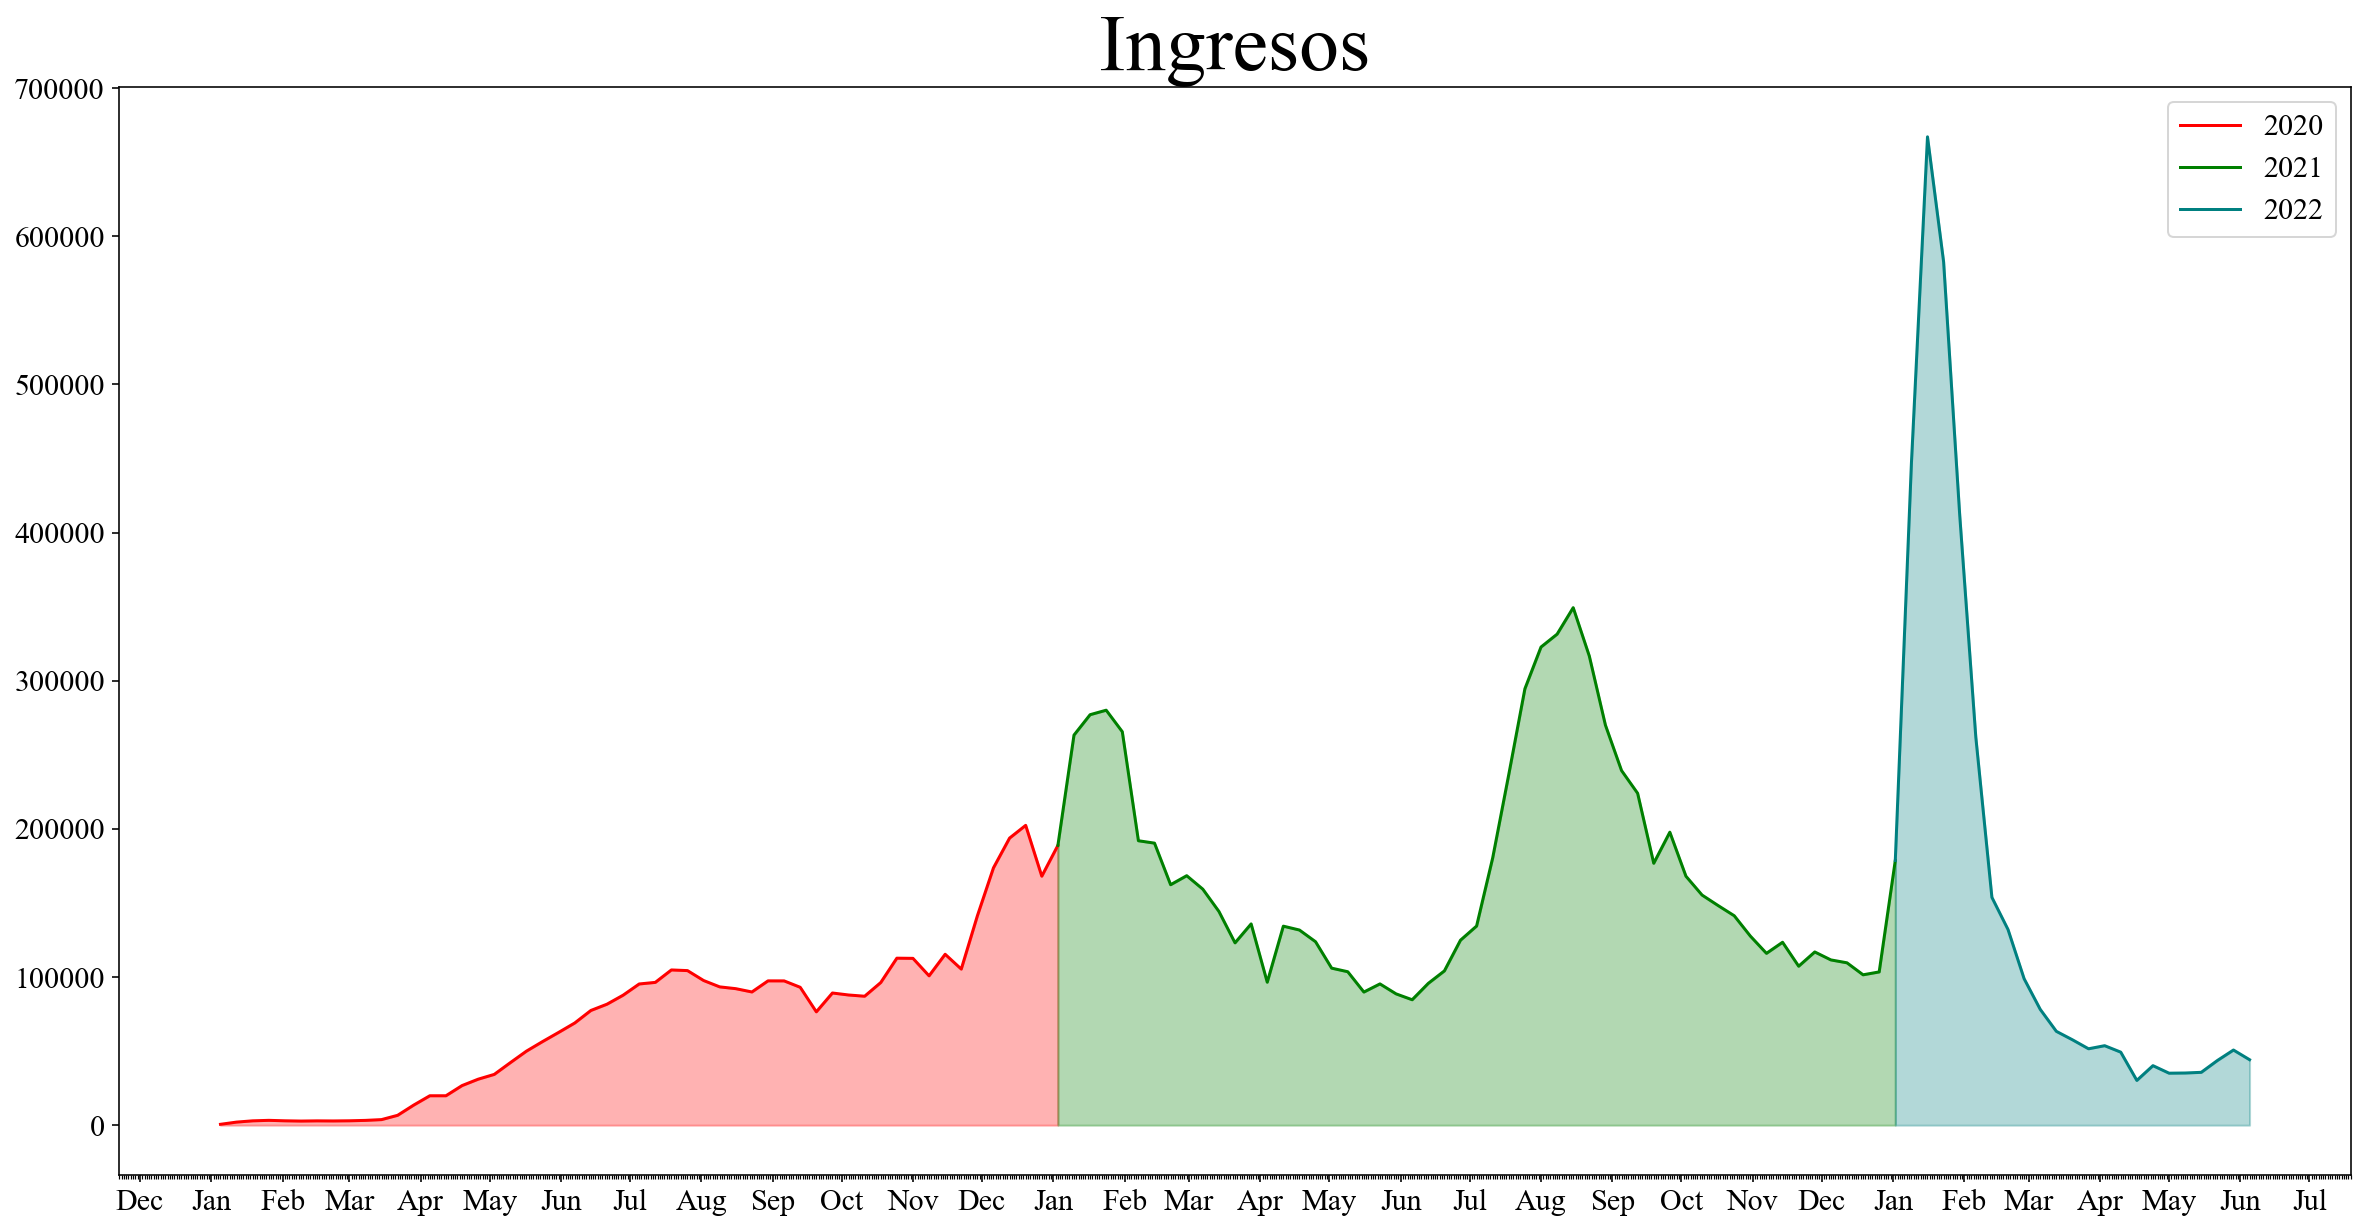

In [3]:
ingresos = covid.groupby(pd.Grouper(freq='W', key='FECHA_INGRESO')).size().reset_index(name='count')
ingresos.sort_values(by='FECHA_INGRESO', inplace=True)

ingresos_2020 = ingresos[ingresos['FECHA_INGRESO']<=datetime(2021,1,3)]
ingresos_2021 = ingresos[(ingresos['FECHA_INGRESO']>=datetime(2021,1,1)) & (ingresos['FECHA_INGRESO']<=datetime(2022,1,2))]
ingresos_2022 = ingresos[ingresos['FECHA_INGRESO']>=datetime(2022,1,1)]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot_date(ingresos_2020["FECHA_INGRESO"], ingresos_2020["count"], '-', color='red')
plt.fill_between(ingresos_2020["FECHA_INGRESO"], ingresos_2020["count"], color='red', alpha=0.3)
ax.plot_date(ingresos_2021["FECHA_INGRESO"], ingresos_2021["count"], '-', color='green', fillstyle='bottom')
plt.fill_between(ingresos_2021["FECHA_INGRESO"], ingresos_2021["count"], color='green', alpha=0.3)
ax.plot_date(ingresos_2022["FECHA_INGRESO"], ingresos_2022["count"], '-', color='teal', fillstyle='bottom')
plt.fill_between(ingresos_2022["FECHA_INGRESO"], ingresos_2022["count"], color='teal', alpha=0.3)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(monthFmt)

plt.legend(['2020','2021','2022'])
plt.title('Ingresos', fontsize=40)

plt.show()

## Defunciones

In [4]:
defunciones_covid = covid[covid['FECHA_DEF']!='9999-99-99'].reset_index()
defunciones_covid['FECHA_DEF'] =  pd.to_datetime(defunciones_covid['FECHA_DEF'], format='%Y-%m-%d')
defunciones_covid

index FECHA_ACTUALIZACION ID_REGISTRO  ORIGEN  SECTOR  ENTIDAD_UM  \
0              6          2022-06-04      z4e838       1      12           9   
1             28          2022-06-04      z1da2d       1      12           2   
2             69          2022-06-04      z49a69       1      12          23   
3            150          2022-06-04      146cbc       1       4          23   
4            158          2022-06-04      060aa5       1      12          22   
...          ...                 ...         ...     ...     ...         ...   
420314  16068197          2022-06-04     m165665       2      12          15   
420315  16068207          2022-06-04     m180731       2      12          15   
420316  16068394          2022-06-04     m0ae8cc       2      12          15   
420317  16068397          2022-06-04     m156e43       2      12          15   
420318  16068432          2022-06-04     m11905b       2      12          15   

        SEXO  ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  ...  OTRO_CASO  \
0          2           15           15             95  ...         99   
1          1            2            2              4  ...         99   
2          1           23           23              4  ...          1   
3          1           23           23              5  ...         99   
4          2           22           22             14  ...         99   
...      ...          ...          ...            ...  ...        ...   
420314     2           15           15             26  ...         99   
420315     2           15           15            999  ...         99   
420316     2           15           15            999  ...         99   
420317     1           15           15            102  ...         99   
420318     2           15           15            999  ...         99   

       TOMA_MUESTRA_LAB RESULTADO_LAB TOMA_MUESTRA_ANTIGENO  \
0                     1             2                     2   
1                     2            97                     2   
2                     2            97                     2   
3                     1             2                     2   
4                     1             4                     2   
...                 ...           ...                   ...   
420314                2            97                     2   
420315                2            97                     2   
420316                2            97                     2   
420317                2            97                     2   
420318                2            97                     2   

        RESULTADO_ANTIGENO  CLASIFICACION_FINAL  MIGRANTE  PAIS_NACIONALIDAD  \
0                       97                    7        99             México   
1                       97                    6        99             México   
2                       97                    2        99             México   
3                       97                    7        99             México   
4                       97                    5        99             México   
...                    ...                  ...       ...                ...   
420314                  97                    6        99             México   
420315                  97                    6        99             México   
420316                  97                    6        99             México   
420317                  97                    6        99             México   
420318                  97                    6        99             México   

        PAIS_ORIGEN  UCI  
0                97    2  
1                97    2  
2                97    1  
3                97   99  
4                97    1  
...             ...  ...  
420314           97    2  
420315           97    2  
420316           97    2  
420317           97    2  
420318           97    2  

[420319 rows x 41 columns]

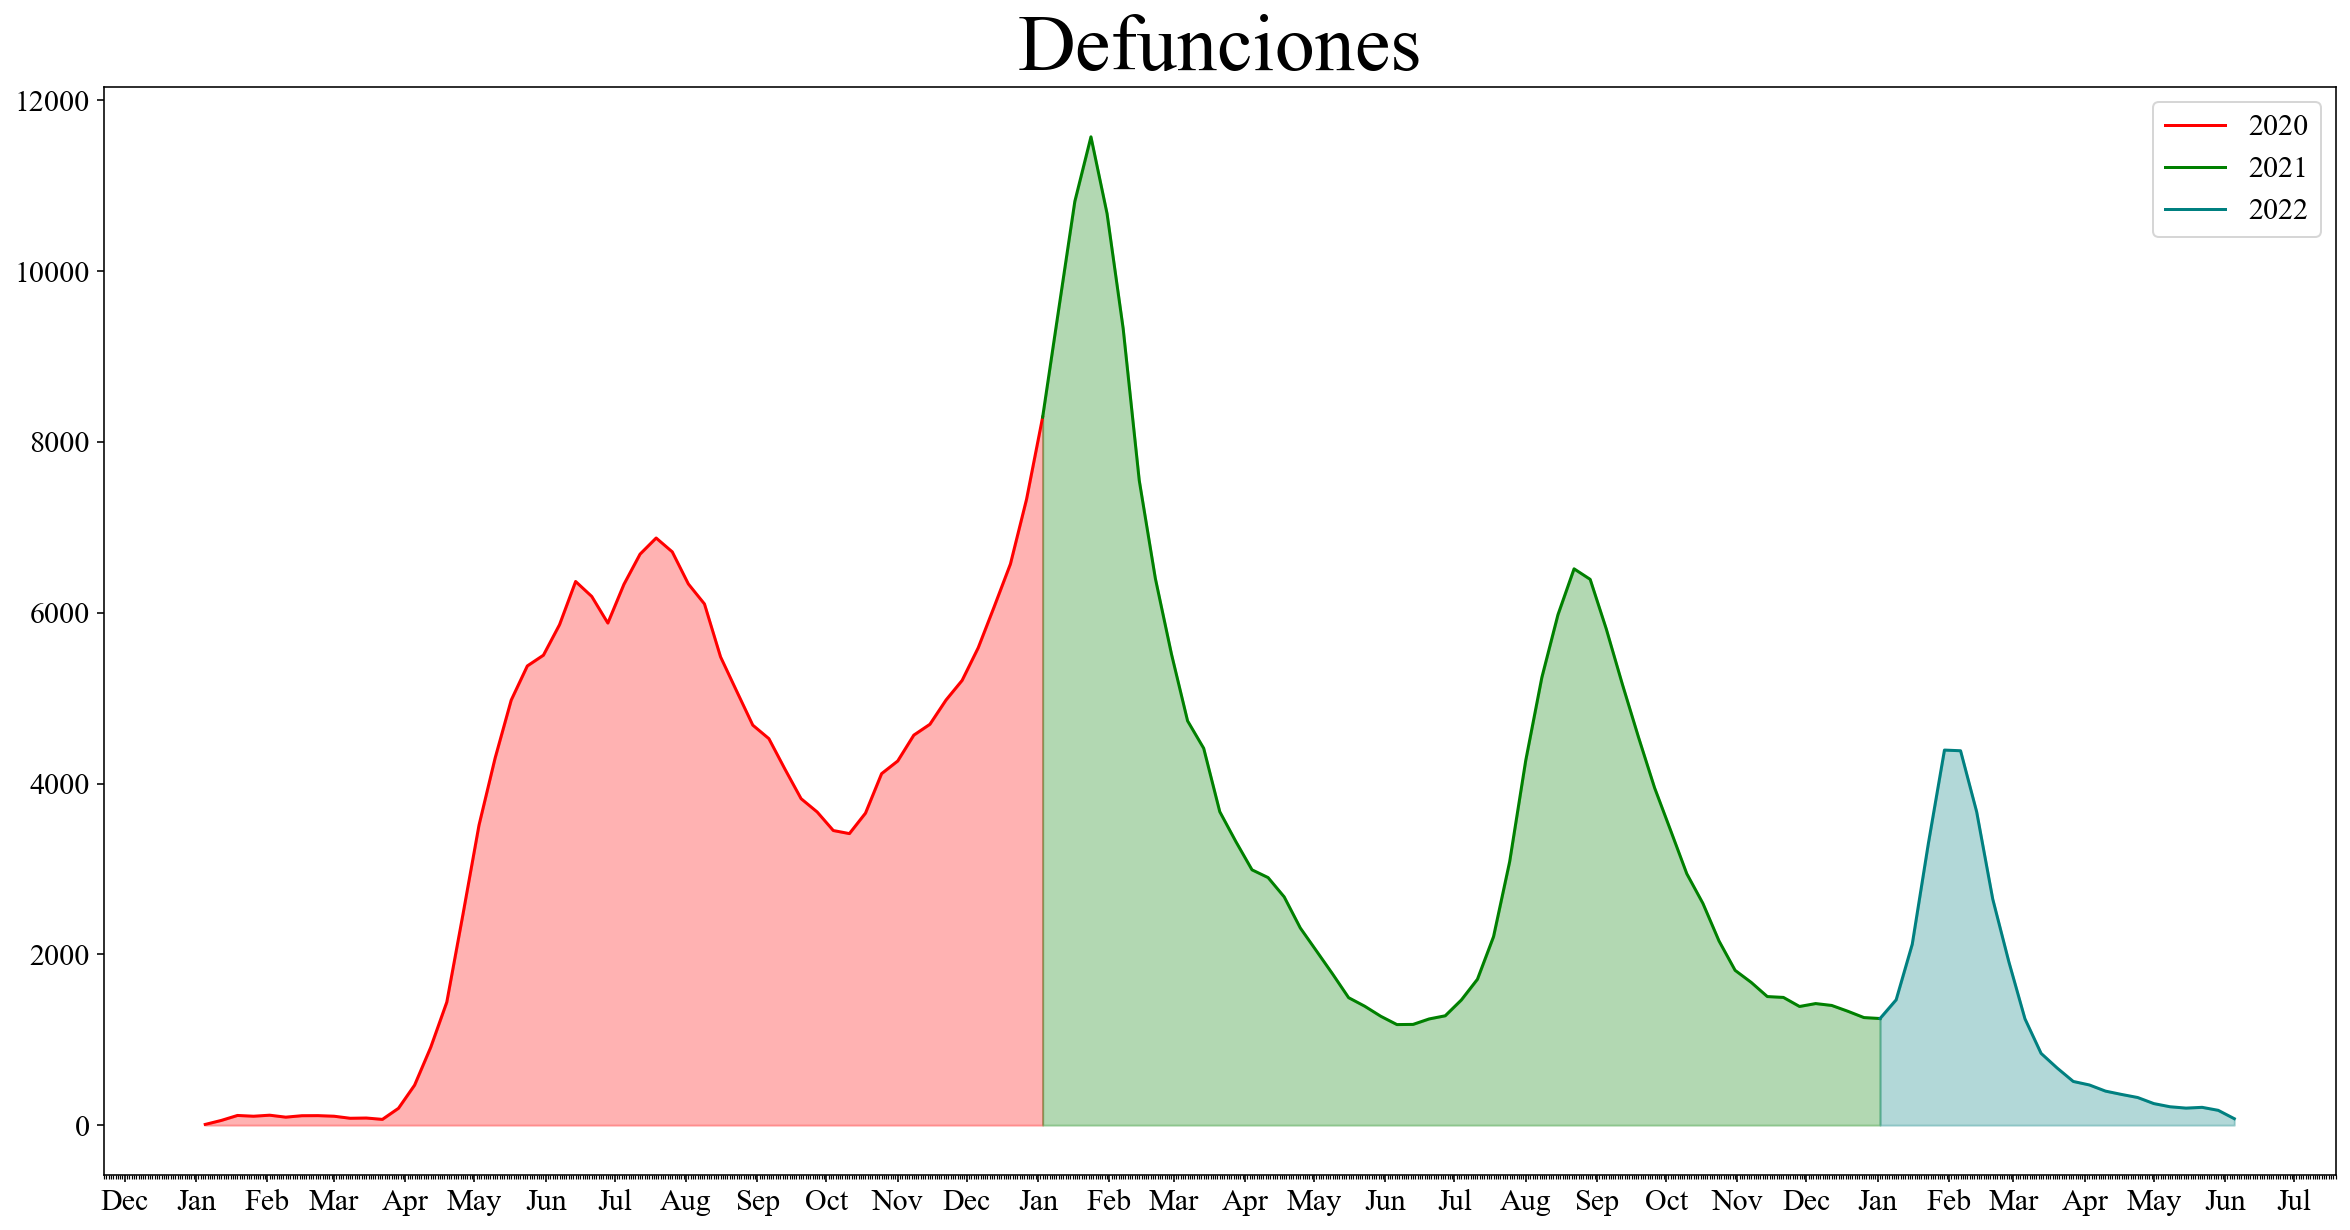

In [5]:
defunciones = defunciones_covid.groupby(pd.Grouper(freq='W', key='FECHA_DEF')).size().reset_index(name='count')
defunciones.sort_values(by='FECHA_DEF', inplace=True)

defunciones_2020 = defunciones[defunciones['FECHA_DEF']<=datetime(2021,1,3)]
defunciones_2021 = defunciones[(defunciones['FECHA_DEF']>=datetime(2021,1,1)) & (defunciones['FECHA_DEF']<=datetime(2022,1,2))]
defunciones_2022 = defunciones[defunciones['FECHA_DEF']>=datetime(2022,1,1)]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot_date(defunciones_2020["FECHA_DEF"], defunciones_2020["count"], '-', color='red')
plt.fill_between(defunciones_2020["FECHA_DEF"], defunciones_2020["count"], color='red', alpha=0.3)
ax.plot_date(defunciones_2021["FECHA_DEF"], defunciones_2021["count"], '-', color='green', fillstyle='bottom')
plt.fill_between(defunciones_2021["FECHA_DEF"], defunciones_2021["count"], color='green', alpha=0.3)
ax.plot_date(defunciones_2022["FECHA_DEF"], defunciones_2022["count"], '-', color='teal', fillstyle='bottom')
plt.fill_between(defunciones_2022["FECHA_DEF"], defunciones_2022["count"], color='teal', alpha=0.3)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(monthFmt)

plt.legend(['2020','2021','2022'])
plt.title('Defunciones', fontsize=40)

plt.show()

## Casos Confirmados por Estado

In [6]:
catalogo_estados ={1: 'Aguascalientes',
                   2: 'Baja California',
                   3: 'Baja California Sur',
                   4: 'Campeche',
                   5: 'Coahuila',
                   6: 'Colima',
                   7: 'Chiapas',
                   8: 'Chihuahua',
                   9: 'Ciudad de México',
                   10: 'Durango',
                   11: 'Guanajuato',
                   12: 'Guerrero',
                   13: 'Hidalgo',
                   14: 'Jalisco',
                   15: 'México',
                   16: 'Michoacán',
                   17: 'Morelos',
                   18: 'Nayarit',
                   19: 'Nuevo León',
                   20: 'Oaxaca',
                   21: 'Puebla',
                   22: 'Querétaro',
                   23: 'Quintana Roo',
                   24: 'San Luis Potosí',
                   25: 'Sinaloa',
                   26: 'Sonora',
                   27: 'Tabasco',
                   28: 'Tamaulipas',
                   29: 'Tlaxcala',
                   30: 'Veracruz',
                   31: 'Yucatán',
                   32: 'Zacatecas'}

In [7]:
catalogo_casos_estados = {'estado': catalogo_estados,
                        'casos_conf': {}}

In [8]:
casos_covid = covid[covid['CLASIFICACION_FINAL']<4]
casos_confirmados = casos_covid.groupby(['ENTIDAD_RES']).size().reset_index(name='count')
for i in range(casos_confirmados.shape[0]):
    row = casos_confirmados.iloc[i]
    catalogo_casos_estados['casos_conf'][row['ENTIDAD_RES']]=row['count']

In [9]:
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' 
mx_regions_geo = requests.get(repo_url).json()

df_mex = pd.DataFrame({'estado': catalogo_casos_estados['estado'].values(), 'casos_conf':   catalogo_casos_estados['casos_conf'].values()})

import plotly.graph_objects as go
fig = go.Figure(go.Choroplethmapbox(name='Mexico', geojson=mx_regions_geo, ids=df_mex['estado'], z=df_mex['casos_conf'],
                                  locations=df_mex['estado'], featureidkey='properties.name', colorscale='reds',
                                  marker=dict(line=dict(color='black'), opacity=0.9)))
fig.update_layout(mapbox_style='carto-positron',
                  mapbox_zoom=4, 
                  mapbox_center = {'lat': 25, 'lon': -99}
                 )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Defunciones por Estado

In [10]:
def_2020_2022 = []
def_2020_2022.append(defunciones_covid[defunciones_covid['FECHA_DEF']<=datetime(2021,1,3)])
def_2020_2022.append(defunciones_covid[(defunciones_covid['FECHA_DEF']>=datetime(2021,1,1)) & (defunciones_covid['FECHA_DEF']<=datetime(2022,1,2))])
def_2020_2022.append(defunciones_covid[defunciones_covid['FECHA_DEF']>=datetime(2022,1,1)])

dicts_2020_2022 = []
for tdf in def_2020_2022:
    tempdict = {'estado': catalogo_estados,
                'defunciones': {}}
    temp_broupby = tdf.groupby(['ENTIDAD_RES']).size().reset_index(name='count')
    for i in range(temp_broupby.shape[0]):
        row = temp_broupby.iloc[i]
        tempdict['defunciones'][row['ENTIDAD_RES']]=row['count']
    dicts_2020_2022.append(tempdict)

In [11]:
df_def_edo_2020 = pd.DataFrame({'estado': dicts_2020_2022[0]['estado'].values(), 'defunciones':   dicts_2020_2022[0]['defunciones'].values()})

fig = go.Figure(go.Choroplethmapbox(name='Mexico', geojson=mx_regions_geo, ids=df_def_edo_2020['estado'], z=df_def_edo_2020['defunciones'],
                                  locations=df_def_edo_2020['estado'], featureidkey='properties.name', colorscale='blues',
                                  marker=dict(line=dict(color='black'), opacity=0.9)))
fig.update_layout(mapbox_style='carto-positron',
                  mapbox_zoom=3.75, 
                  mapbox_center = {'lat': 25, 'lon': -99}
                 )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [12]:
df_def_edo_2021 = pd.DataFrame({'estado': dicts_2020_2022[1]['estado'].values(), 'defunciones':   dicts_2020_2022[1]['defunciones'].values()})

fig = go.Figure(go.Choroplethmapbox(name='Mexico', geojson=mx_regions_geo, ids=df_def_edo_2021['estado'], z=df_def_edo_2021['defunciones'],
                                  locations=df_def_edo_2021['estado'], featureidkey='properties.name', colorscale='blues',
                                  marker=dict(line=dict(color='black'), opacity=0.9)))
fig.update_layout(mapbox_style='carto-positron',
                  mapbox_zoom=3.75, 
                  mapbox_center = {'lat': 25, 'lon': -99}
                 )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [13]:
df_def_edo_2022 = pd.DataFrame({'estado': dicts_2020_2022[2]['estado'].values(), 'defunciones':   dicts_2020_2022[2]['defunciones'].values()})

fig = go.Figure(go.Choroplethmapbox(name='Mexico', geojson=mx_regions_geo, ids=df_def_edo_2022['estado'], z=df_def_edo_2022['defunciones'],
                                  locations=df_def_edo_2022['estado'], featureidkey='properties.name', colorscale='blues',
                                  marker=dict(line=dict(color='black'), opacity=0.9)))
fig.update_layout(mapbox_style='carto-positron',
                  mapbox_zoom=3.75, 
                  mapbox_center = {'lat': 25, 'lon': -99}
                 )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Proporción de género por Covid

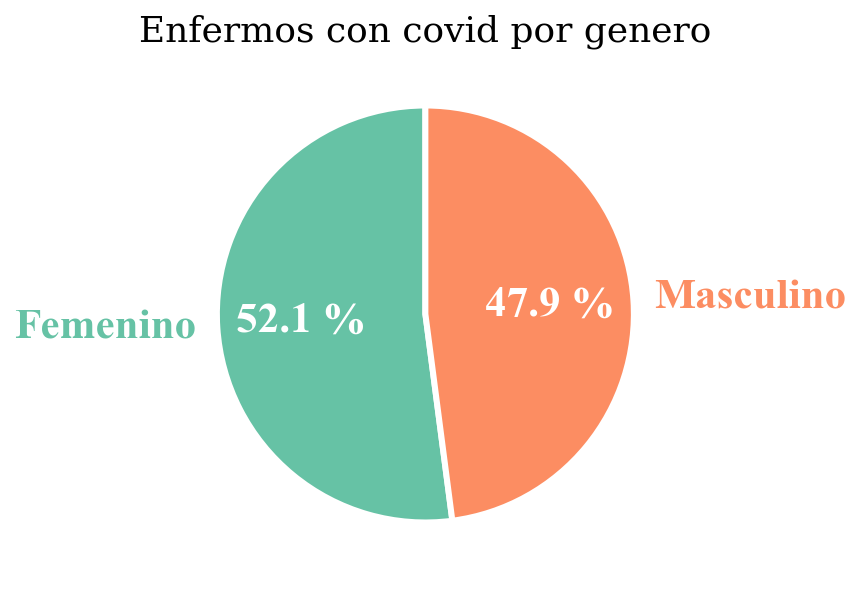

In [14]:
positivos_sars = covid.query("CLASIFICACION_FINAL == 3")
x = positivos_sars['SEXO'].value_counts().to_list()
labels = ['Femenino', 'Masculino']
fig, ax = plt.subplots(figsize=(6,6))
# Definimos una paleta de colores de Seaborn
palette_color = sns.color_palette("Set2")

patches, texts, pcts = ax.pie(x, labels=labels, autopct="%.1f %%", colors=palette_color,
                              wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                              textprops={'size': 'x-large'}, startangle=90)
ax.set_title("Enfermos con covid por genero", fontsize=18, family='serif')
# Ajustamos cada etiqueta con el correspondiente color de cada rebanada
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
# Ajustamos los estilos de los elementos     
plt.setp(pcts, color="white", fontweight="bold")
plt.setp(texts, fontweight="bold")
plt.tight_layout()

## Sector donde se recibieron más pacientes por genero

In [15]:
# Hacemo dicionarios para nuestros valores categoricos
dict_sector = {1:  "CRUZ ROJA",
               2: "DIF",
               3: "ESTATAL",
               4: "IMSS",
               5: "IMSS-BIENESTAR",
               6: "ISSSTE",
               7: "MUNICIPAL",
               8: "PEMEX",
               9: "PRIVADA",
               10: "SEDENA",
               11: "SEMAR",
               12: "SSA",
               13: "UNIVERSITARIO",
               99: "NO ESPECIFICADO"}

dict_genero = {1: 'Mujer', 2: 'Hombre'}

# Agrupamos cada sector y su genero
agg_sector = positivos_sars.groupby(["SECTOR", "SEXO"])["SEXO"].count().unstack().fillna(0)

# Hacemo ahora el mapeo con su respectivo sector
new_indexes = [dict_sector[i] for i in agg_sector.index.values]
new_columns = [dict_genero[i] for i in agg_sector.columns.values]
agg_sector.index = new_indexes
agg_sector.rename(dict(zip(agg_sector.columns.values.tolist(), new_columns)), axis=1, inplace=True)

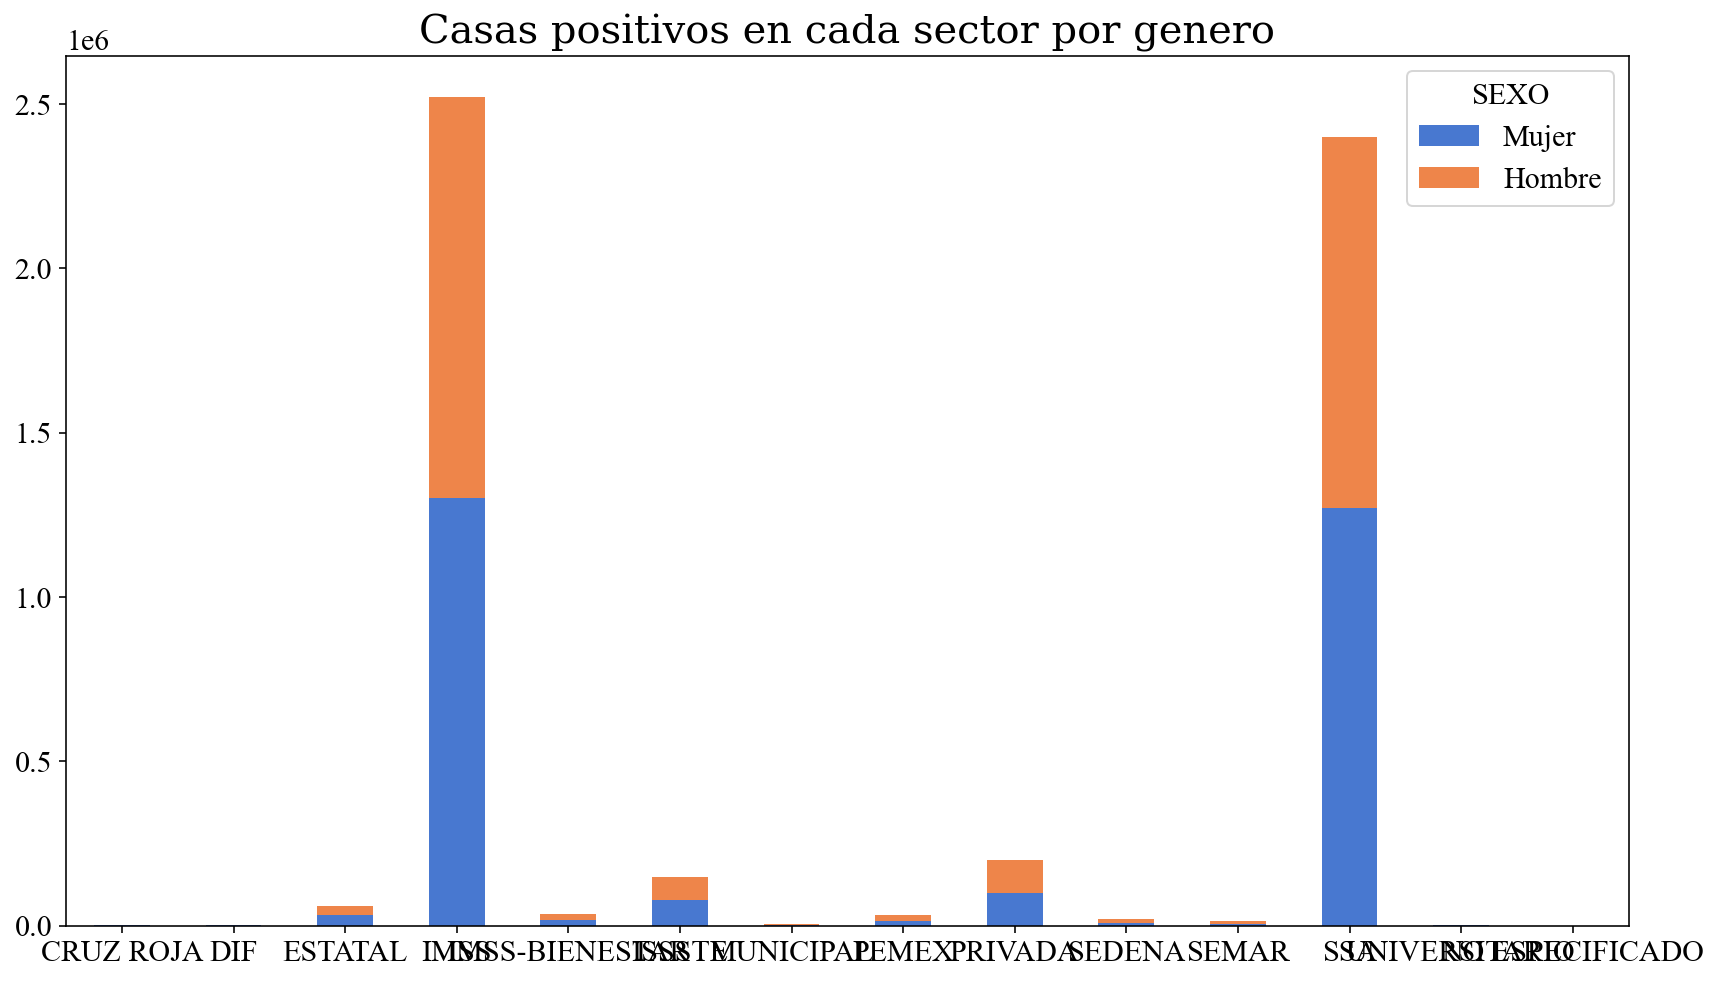

In [16]:
# Definimos una paleta de colores de Seaborn
palette_color = sns.color_palette("muted")
# Generamos nuestra grafica de barras apiladas
agg_sector.plot(kind='bar', stacked=True, figsize=(14,8), color=palette_color)
plt.title("Casas positivos en cada sector por genero", fontsize=20, family='serif')
plt.xticks(rotation=0, ha="center")
plt.show()

## Nacionalidad de contagiados por COVID

In [17]:
#Nacionalidad 
#Hacemos una copia del dataframe y solo dejamos lo que utilizaremos para la primer gráfica 
copia = covid.copy()

nacionalidad = copia.loc[:,'NACIONALIDAD']
nacionalidad1 = nacionalidad.to_frame()
nacionalidad2 = nacionalidad1.assign(Conteo=1)
nacionalidad3 = nacionalidad2.groupby('NACIONALIDAD')['Conteo'].sum().reset_index()
#Cambiamos los valores
nacionalidad3['NACIONALIDAD'] = nacionalidad3['NACIONALIDAD'].map({1:'Mexicano', 2:'Extranjero'})
nacionalidad3


NACIONALIDAD    Conteo
0     Mexicano  15954206
1   Extranjero    117288

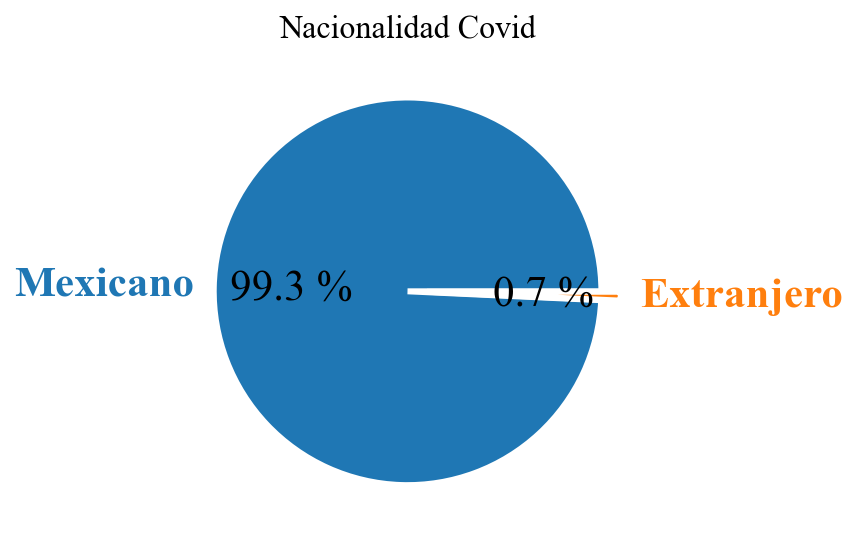

In [18]:
#Graficamos
desfase = (0,0.1)
nombres = ["Mexicano", "Extranjero"]
fig, ax = plt.subplots(figsize=(6,6))

#plt.figure(figsize=(10,8))
patches, texts, pcts = ax.pie(nacionalidad3['Conteo'], labels = nacionalidad3['NACIONALIDAD'], autopct="%0.1f %%", explode=desfase, 
        wedgeprops={'linewidth':3.0, 'edgecolor':'white'}, textprops={'size':'x-large'})
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.title('Nacionalidad Covid', fontsize= 16)
plt.setp(texts, fontweight='bold')
plt.tight_layout()

## Cantidad de cruces de frontera mexicana


In [19]:
#Turismo
turismo = pd.read_csv('Turistas frontera 2020-2022 - Hoja 1.csv')
turismo1 = turismo.copy()
turismo2 = turismo1.drop(['Meses'], axis=1)
#Quitamos los espacios en los strings
turismo2['Peatones_Entrada'] = turismo2['Peatones_Entrada'].str.replace(' ', '')
turismo2['Peatones_Salida'] = turismo2['Peatones_Salida'].str.replace(' ', '')
turismo2['Automovil_Entrada'] = turismo2['Automovil_Entrada'].str.replace(' ', '')
turismo2['Automovil_Salida'] = turismo2['Automovil_Salida'].str.replace(' ', '')

#Pasamos todo a números los valroes.
turismo2 = turismo2.astype('int')
turismo2.dtypes


Año                  int32
Peatones_Entrada     int32
Peatones_Salida      int32
Automovil_Entrada    int32
Automovil_Salida     int32
dtype: object

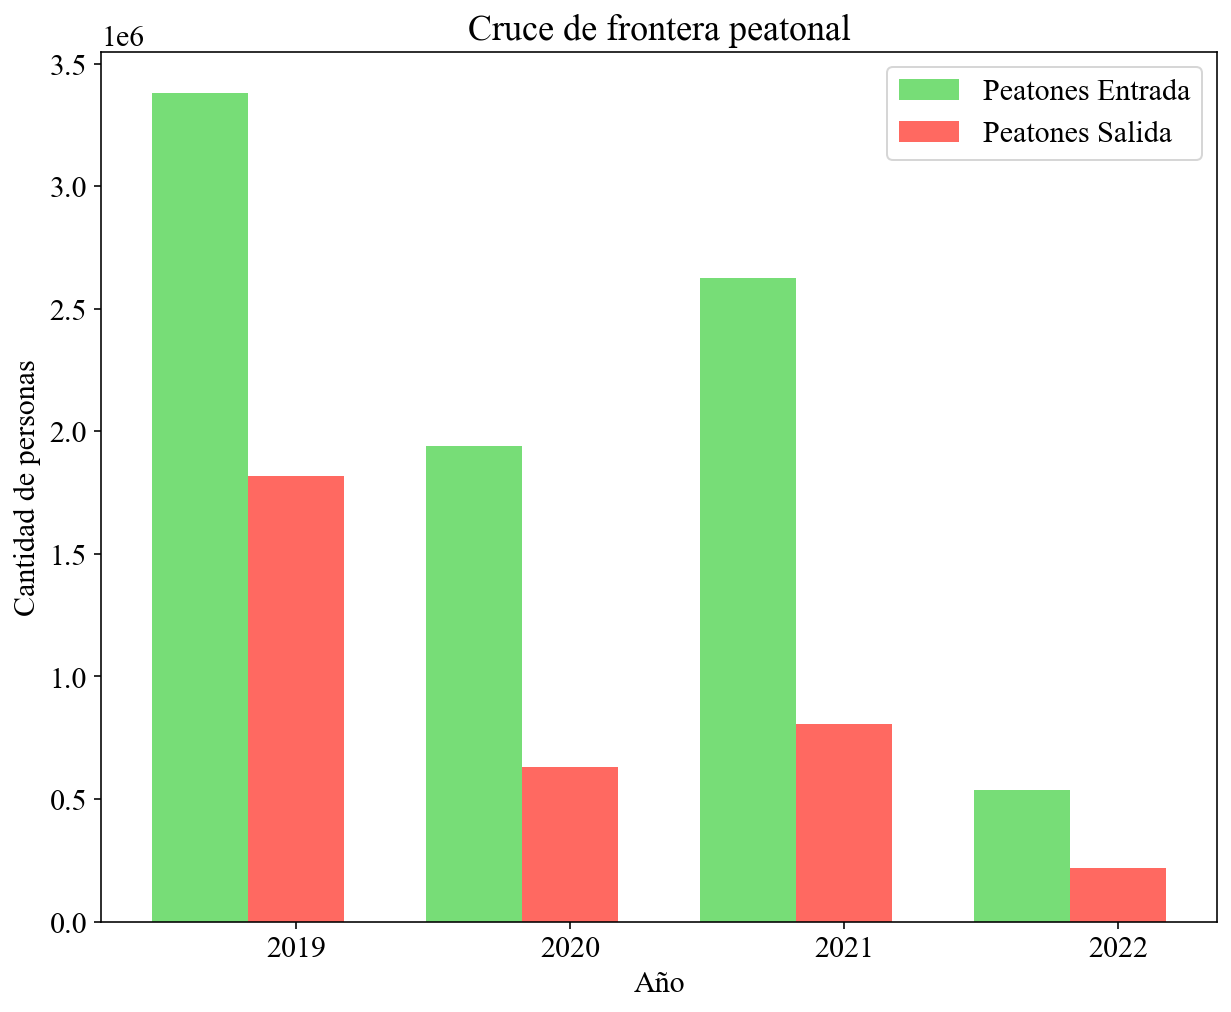

In [20]:
#Graficamos los peatones por año
#Tomamos solo Peatones Entrada y salida por año
peatones = turismo2.drop(['Automovil_Entrada', 'Automovil_Salida'], axis=1)
peatones1 = peatones.groupby('Año').sum().reset_index()



serie_1 = peatones1['Peatones_Entrada']
serie_2 = peatones1['Peatones_Salida']
 

numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
color1 = ['#77dd77']
color2 = ['#ff6961']
plt.figure(figsize=(10,8))
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='Peatones Entrada', color= color1)
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Peatones Salida', color=color2)
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('2019', '2020', '2021', '2022'))
 
plt.ylabel('Cantidad de personas')
plt.xlabel('Año')
plt.title('Cruce de frontera peatonal')
 
plt.show()

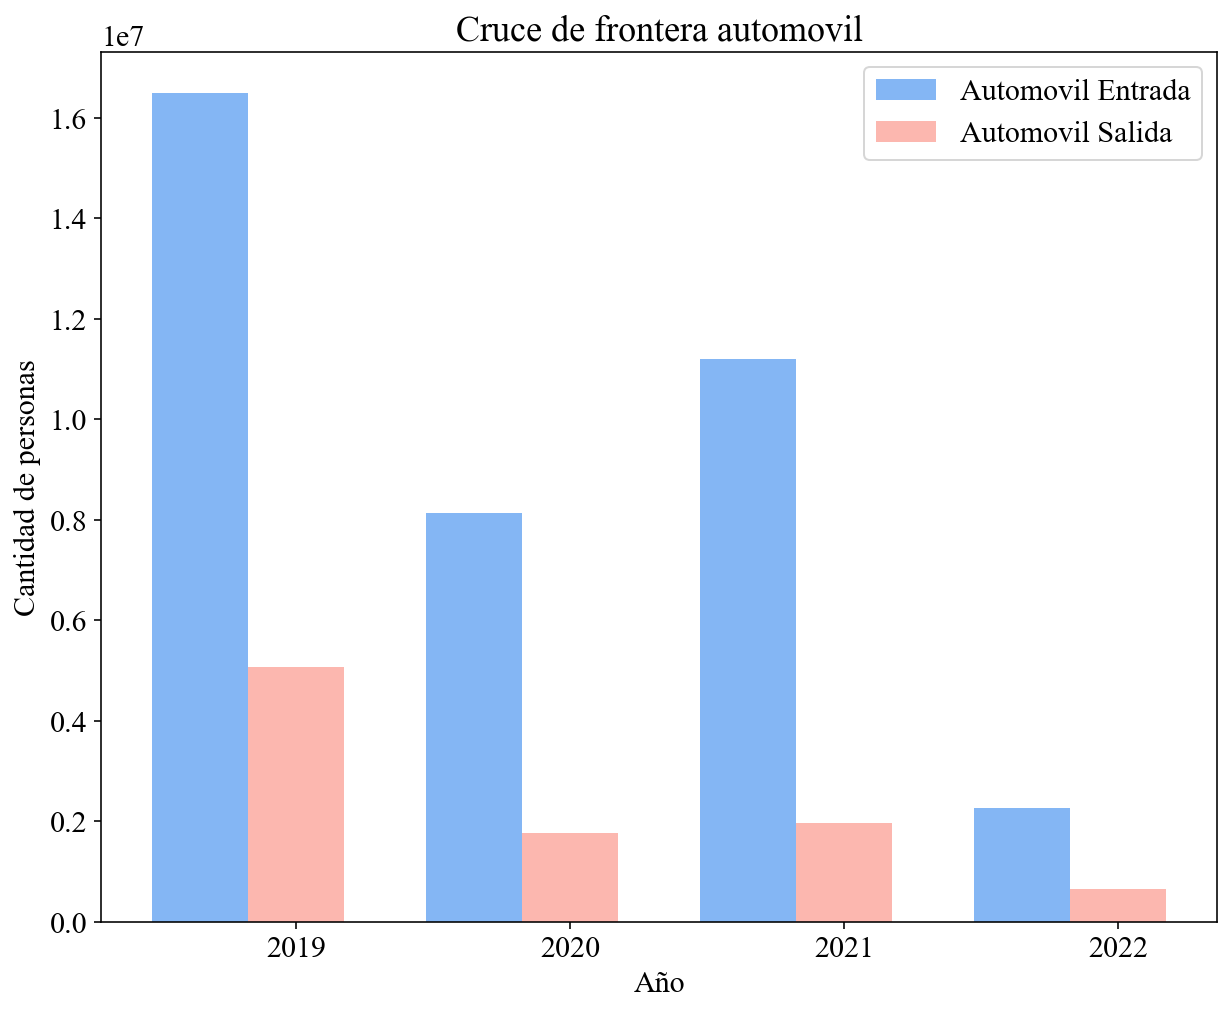

In [21]:
#Graficamos los autos por año
#Tomamos solo Automovil Entrada y salida por año
automovil = turismo2.drop(['Peatones_Entrada', 'Peatones_Salida'], axis=1)
automovil1 = automovil.groupby('Año').sum().reset_index()

#Graficamos 

serie_1 = automovil1['Automovil_Entrada']
serie_2 = automovil1['Automovil_Salida']
 

numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
color1 = ['#84b6f4']
color2 = ['#fcb7af']
plt.figure(figsize=(10,8))
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='Automovil Entrada', color= color1)
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Automovil Salida', color=color2)
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('2019', '2020', '2021', '2022'))
 
plt.ylabel('Cantidad de personas')
plt.xlabel('Año')
plt.title('Cruce de frontera automovil')
 
plt.show()

## Ingreso generado por turistas internacionesles 2019-2020

In [23]:
ingresos_turistas = pd.read_csv("saldo_total_turismo.csv")

ingresos_2019 = ingresos_turistas.iloc[7:19,:]
ingresos_2020 = ingresos_turistas.iloc[20:32,:]
ingresos_2021 = ingresos_turistas.iloc[33:45,:]

turistas_internacionales19 = [ingreso.replace(' ', '') for ingreso in ingresos_2019['Turistas internacionales']]
turistas_internacionales20 = [ingreso.replace(' ', '') for ingreso in ingresos_2020['Turistas internacionales']]
turistas_internacionales21 = [ingreso.replace(' ', '') for ingreso in ingresos_2021['Turistas internacionales']]

turistas_inter19 = np.array(turistas_internacionales19, dtype=np.int64)
turistas_inter20 = np.array(turistas_internacionales20, dtype=np.int64)
turistas_inter21 = np.array(turistas_internacionales21, dtype=np.int64)

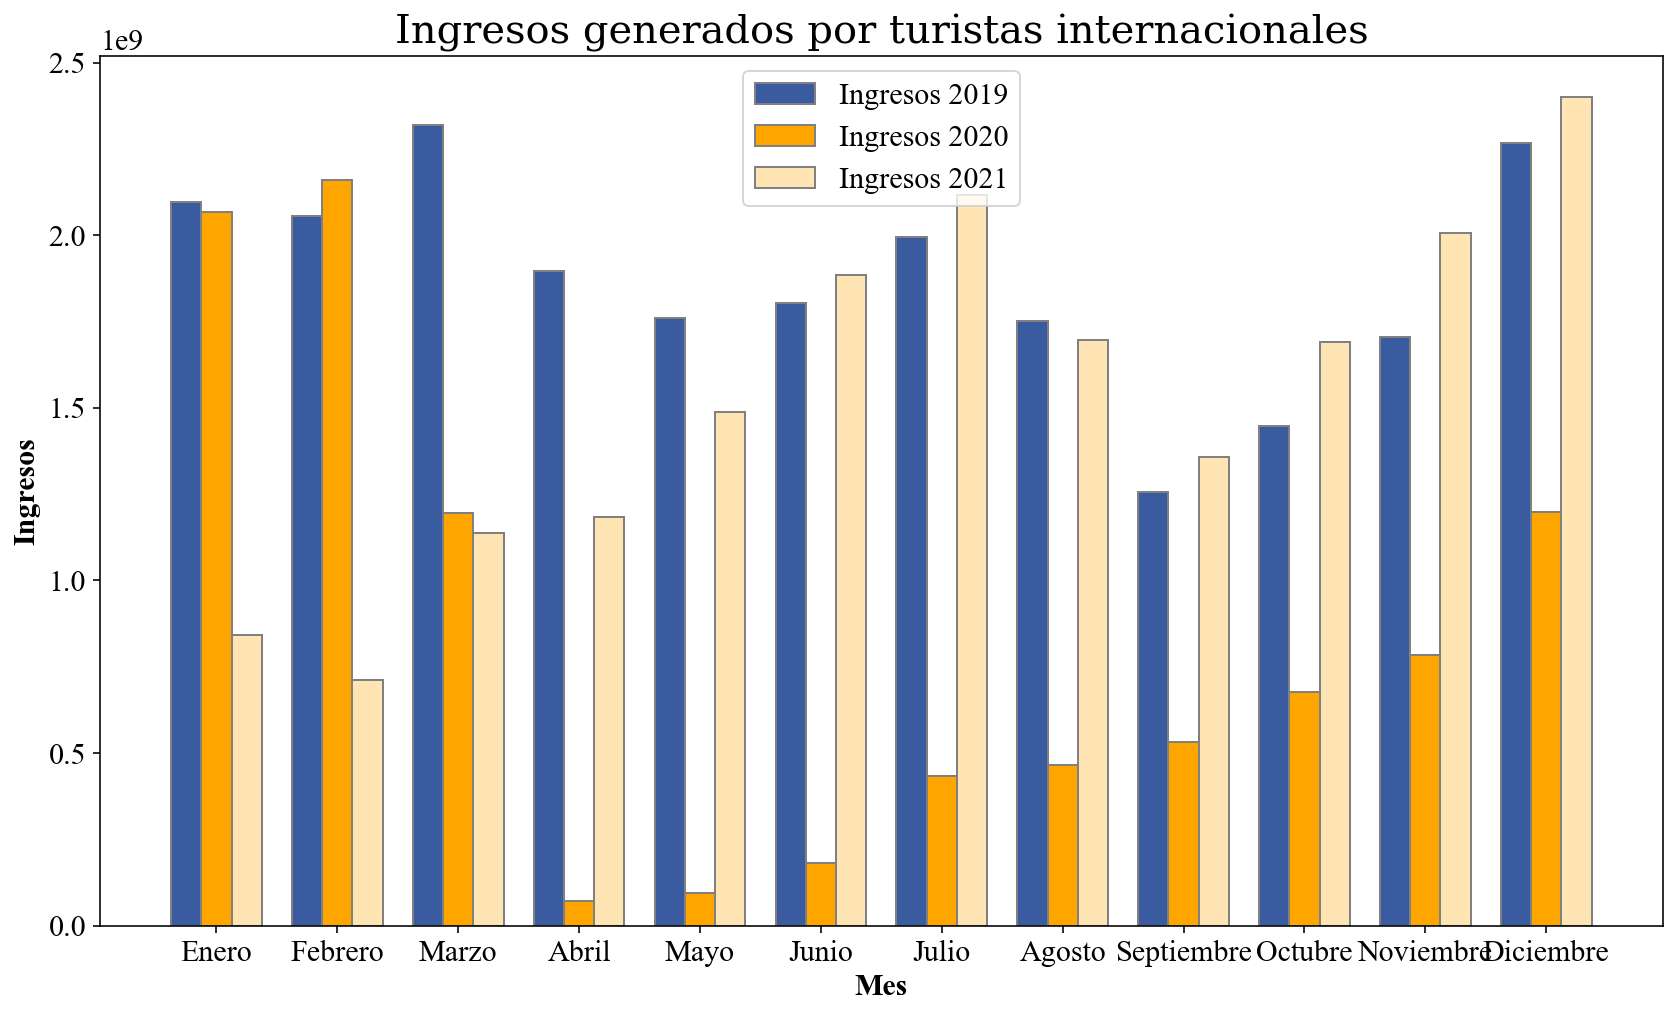

In [24]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(14, 8))
 
# set height of bar
IT = turistas_inter19
ECE = turistas_inter20
CSE = turistas_inter21
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='#3A5BA0', width = barWidth,
        edgecolor ='grey', label ='Ingresos 2019')
plt.bar(br2, ECE, color ='#FFA500', width = barWidth,
        edgecolor ='grey', label ='Ingresos 2020')
plt.bar(br3, CSE, color ='#FFE5B4', width = barWidth,
        edgecolor ='grey', label ='Ingresos 2021')
 
# Adding Xticks
plt.title("Ingresos generados por turistas internacionales", fontsize=20, family="serif")
plt.xlabel('Mes', fontweight ='bold', fontsize = 15)
plt.ylabel('Ingresos', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))], 
           ingresos_2019['Mes'].values)
 
plt.legend()
plt.show()

# Turismo de México al Extranjero 

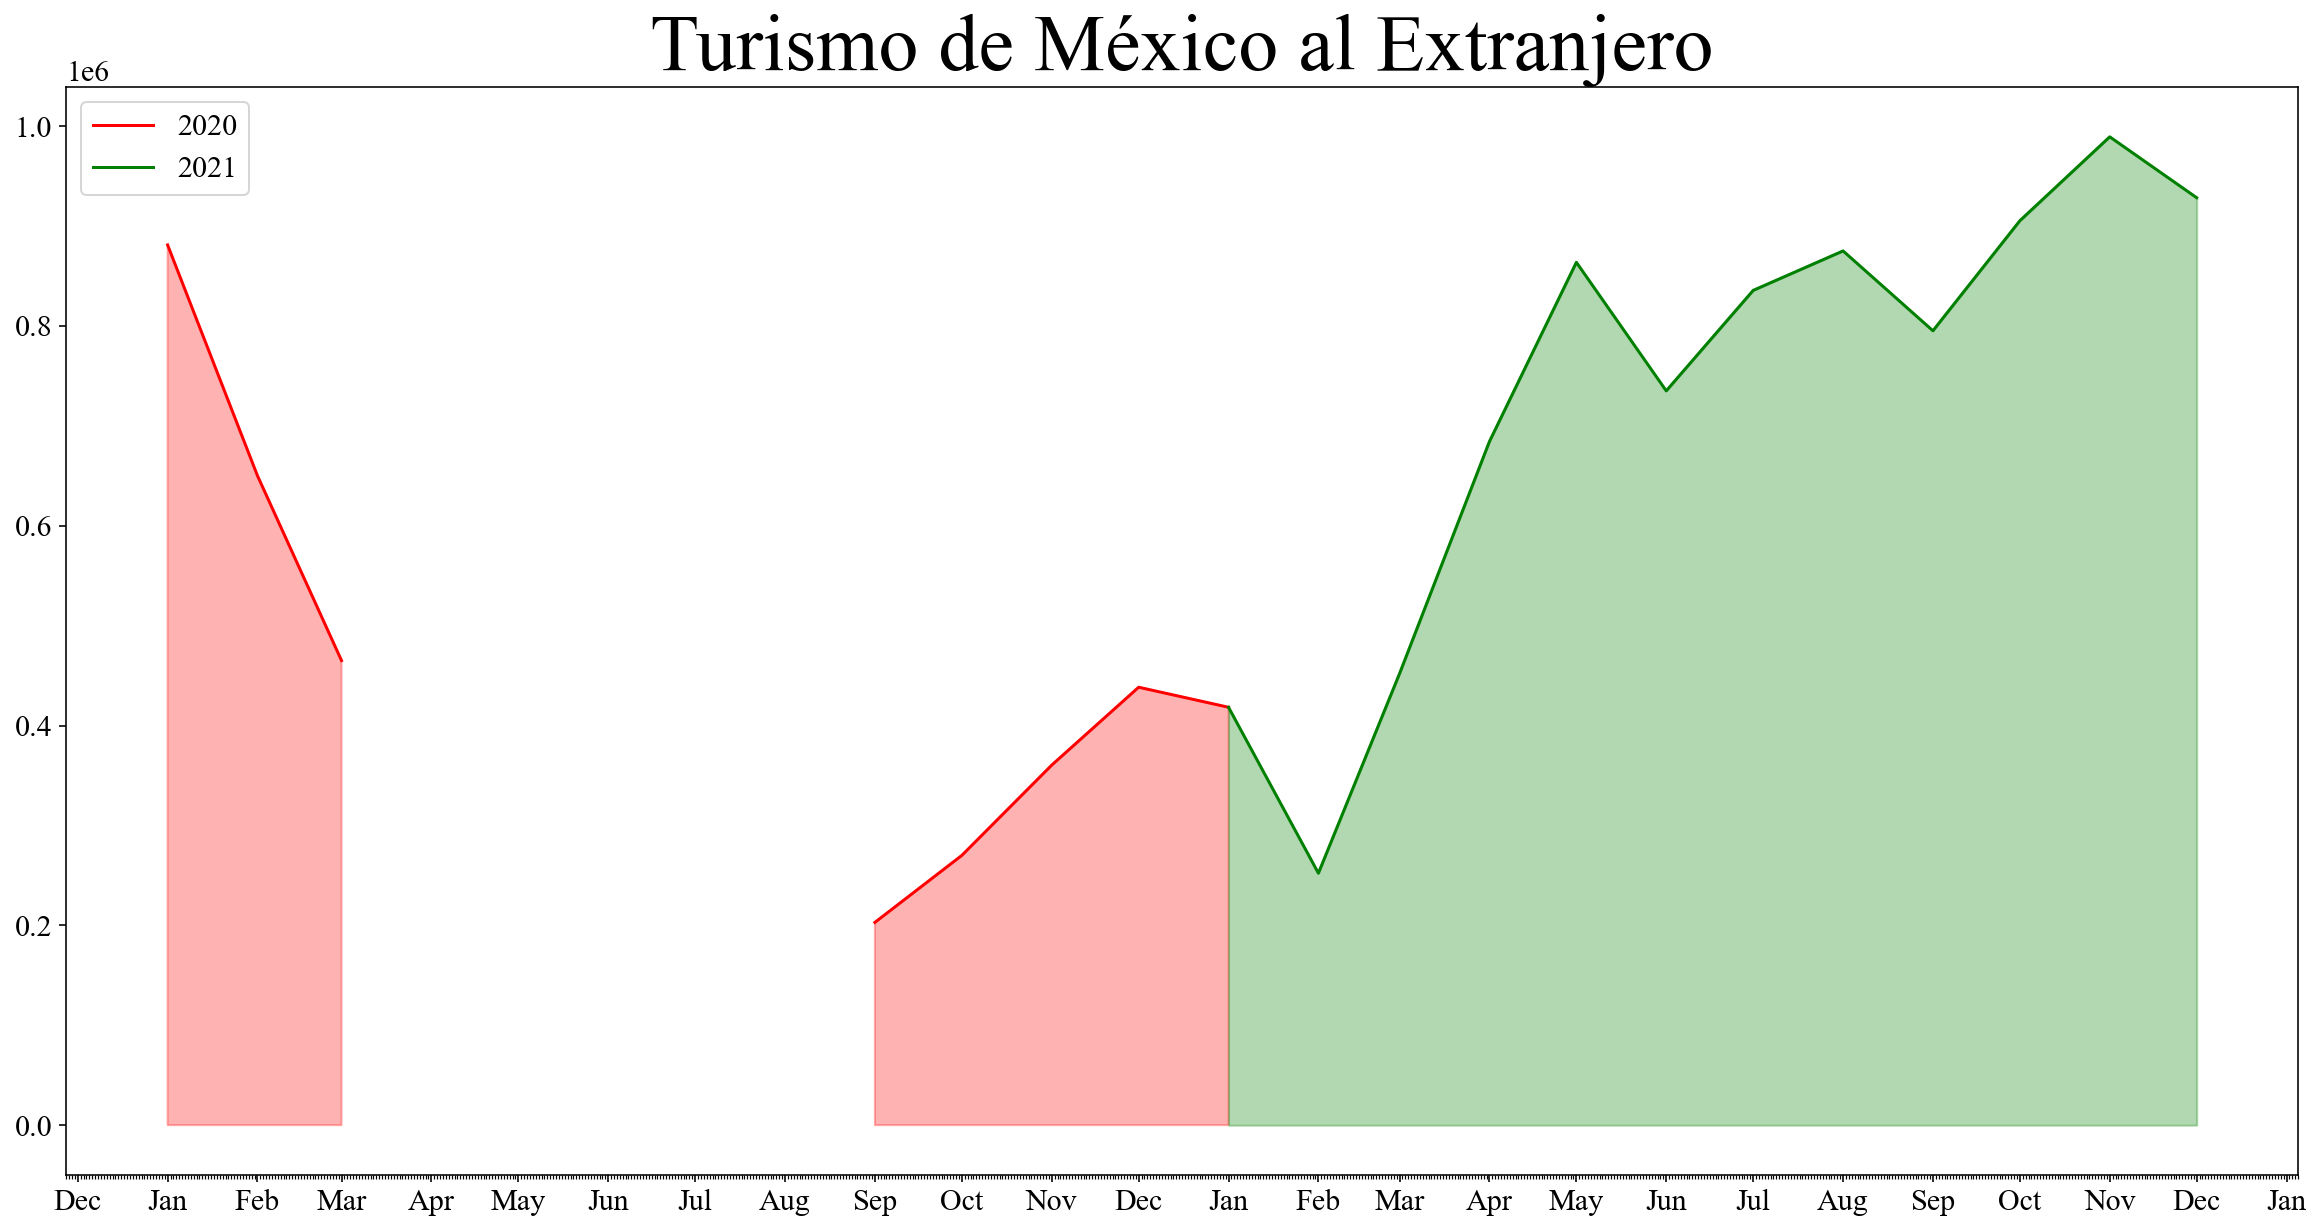

In [25]:
turismo =  pd.read_csv('tur_mex_ext.csv')
turismo['Mes'] =  pd.to_datetime(turismo['Mes'], format='%Y-%m-%d')
turismo

tur_total = turismo[['Mes','Total']]

tur_total_2020 = tur_total[tur_total['Mes']<=datetime(2021,1,1)]
tur_total_2021 = tur_total[(tur_total['Mes']>=datetime(2021,1,1)) & (tur_total['Mes']<=datetime(2022,1,1))]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot_date(tur_total_2020["Mes"], tur_total_2020["Total"], '-', color='red')
plt.fill_between(tur_total_2020["Mes"], tur_total_2020["Total"], color='red', alpha=0.3)
ax.plot_date(tur_total_2021["Mes"], tur_total_2021["Total"], '-', color='green', fillstyle='bottom')
plt.fill_between(tur_total_2021["Mes"], tur_total_2021["Total"], color='green', alpha=0.3)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(monthFmt)

plt.legend(['2020','2021'])
plt.title('Turismo de México al Extranjero', fontsize=40)

plt.show()

# Turismo de México al Extranjero vs Hospitalizaciones

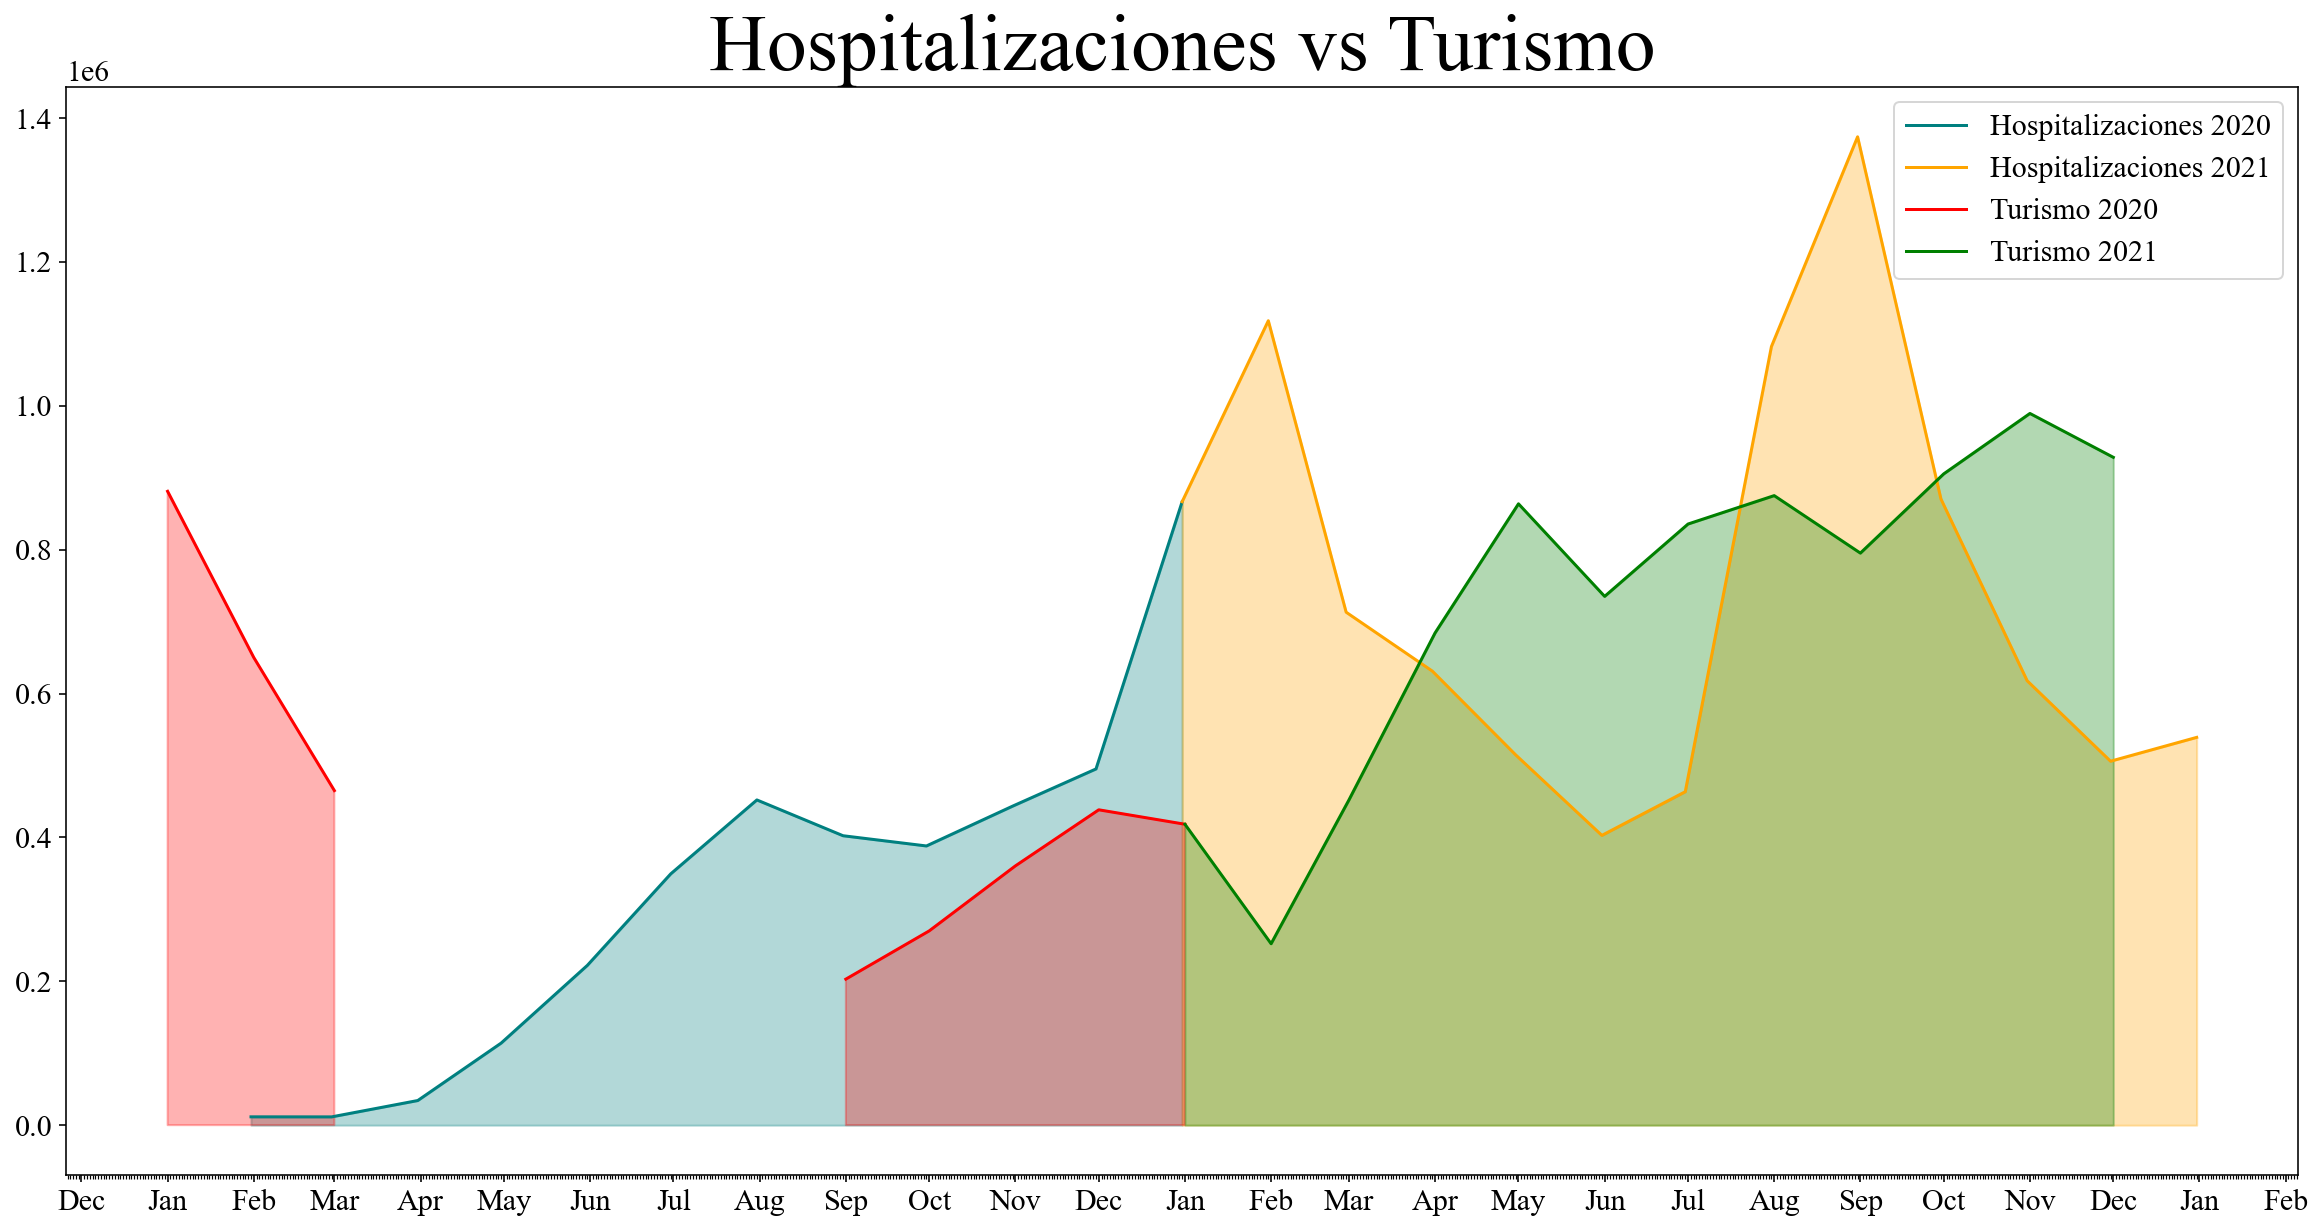

In [26]:
ingresos_mensual = covid.groupby(pd.Grouper(freq='M', key='FECHA_INGRESO')).size().reset_index(name='count')
ingresos_mensual.sort_values(by='FECHA_INGRESO', inplace=True)

ingresos_mensual_2020 = ingresos_mensual[ingresos_mensual['FECHA_INGRESO']<=datetime(2021,1,1)]
ingresos_mensual_2021 = ingresos_mensual[(ingresos_mensual['FECHA_INGRESO']>=datetime(2020,12,31)) & (ingresos_mensual['FECHA_INGRESO']<=datetime(2022,1,1))]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot_date(ingresos_mensual_2020["FECHA_INGRESO"], ingresos_mensual_2020["count"], '-', color='teal')
plt.fill_between(ingresos_mensual_2020["FECHA_INGRESO"], ingresos_mensual_2020["count"], color='teal', alpha=0.3)
ax.plot_date(ingresos_mensual_2021["FECHA_INGRESO"], ingresos_mensual_2021["count"], '-', color='orange', fillstyle='bottom')
plt.fill_between(ingresos_mensual_2021["FECHA_INGRESO"], ingresos_mensual_2021["count"], color='orange', alpha=0.3)

# tur
tur_total = turismo[['Mes','Total']]

tur_total_2020 = tur_total[tur_total['Mes']<=datetime(2021,1,1)]
tur_total_2021 = tur_total[(tur_total['Mes']>=datetime(2021,1,1)) & (tur_total['Mes']<datetime(2022,1,1))]

ax.plot_date(tur_total_2020["Mes"], tur_total_2020["Total"], '-', color='red')
plt.fill_between(tur_total_2020["Mes"], tur_total_2020["Total"], color='red', alpha=0.3)
ax.plot_date(tur_total_2021["Mes"], tur_total_2021["Total"], '-', color='green')
plt.fill_between(tur_total_2021["Mes"], tur_total_2021["Total"], color='green', alpha=0.3)
#tur

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(monthFmt)

plt.legend(['Hospitalizaciones 2020','Hospitalizaciones 2021','Turismo 2020','Turismo 2021'])
plt.title('Hospitalizaciones vs Turismo', fontsize=40)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86c2f1e1-951a-4e81-833c-133f0273f3d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>